# Dirichlet Process

In [18]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

## Stick-breaking

In [63]:
class DirichletProcess:
    def __init__(self, alpha, n, G_0):
        self.alpha = alpha
        self.n = n
        self.G_0 = G_0
    
    def pdf(self):
        b = st.beta(1, self.alpha).rvs(size=self.n)
        p = np.zeros(self.n)
        p[0] = b[0]
        p[1:] = np.asarray([b[i] * np.prod(1-b[:i]) for i in range(1,self.n)])
        p[-1] = 1 - sum(p[:-1])
        return p
    
    def rvs(self, size, y=None):
        p = self.pdf()
        if y is None:
            y = self.G_0.rvs(size=size)
        return np.random.choice(y, size=size, replace=True, p=p)

In [77]:
dp = DirichletProcess(alpha=10, n=1000, G_0=st.norm(0, 1))
y = dp.G_0.rvs(dp.n)
p = dp.pdf()

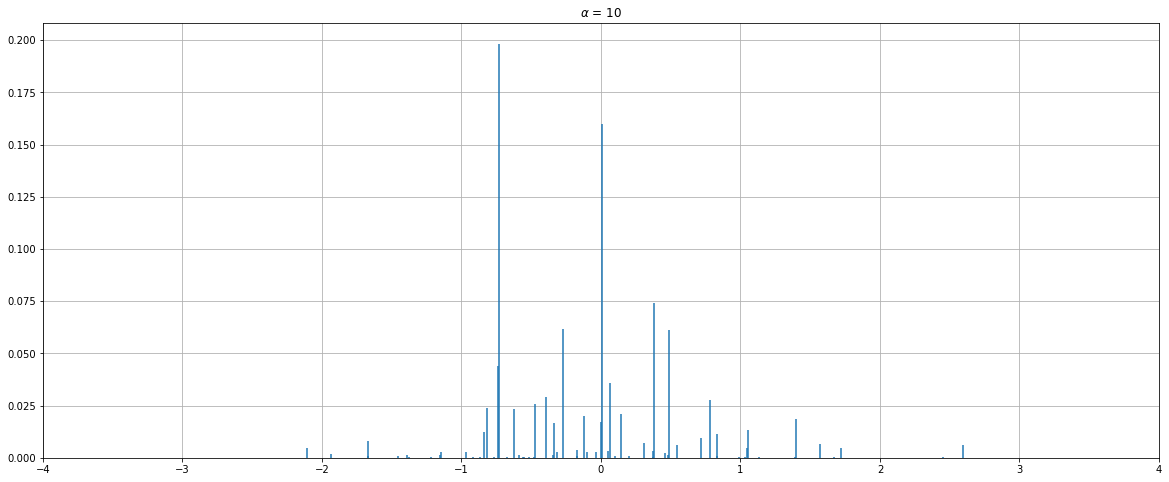

In [78]:
fix, ax = plt.subplots(figsize=(20,8))
[ax.vlines(y[i], 0, p[i]) for i in range(dp.n)]
ax.set_ylim(0,None)
ax.set_xlim(-4,4)
ax.grid(True)
ax.set_title(f"$\\alpha$ = {dp.alpha}");

In [79]:
dp = [None] * 4
dp[0] = DirichletProcess(alpha=1, n=10000, G_0=st.norm(0, 1))
dp[1] = DirichletProcess(alpha=10, n=10000, G_0=st.norm(0, 1))
dp[2] = DirichletProcess(alpha=100, n=10000, G_0=st.norm(0, 1))
dp[3] = DirichletProcess(alpha=1000, n=10000, G_0=st.norm(0, 1))

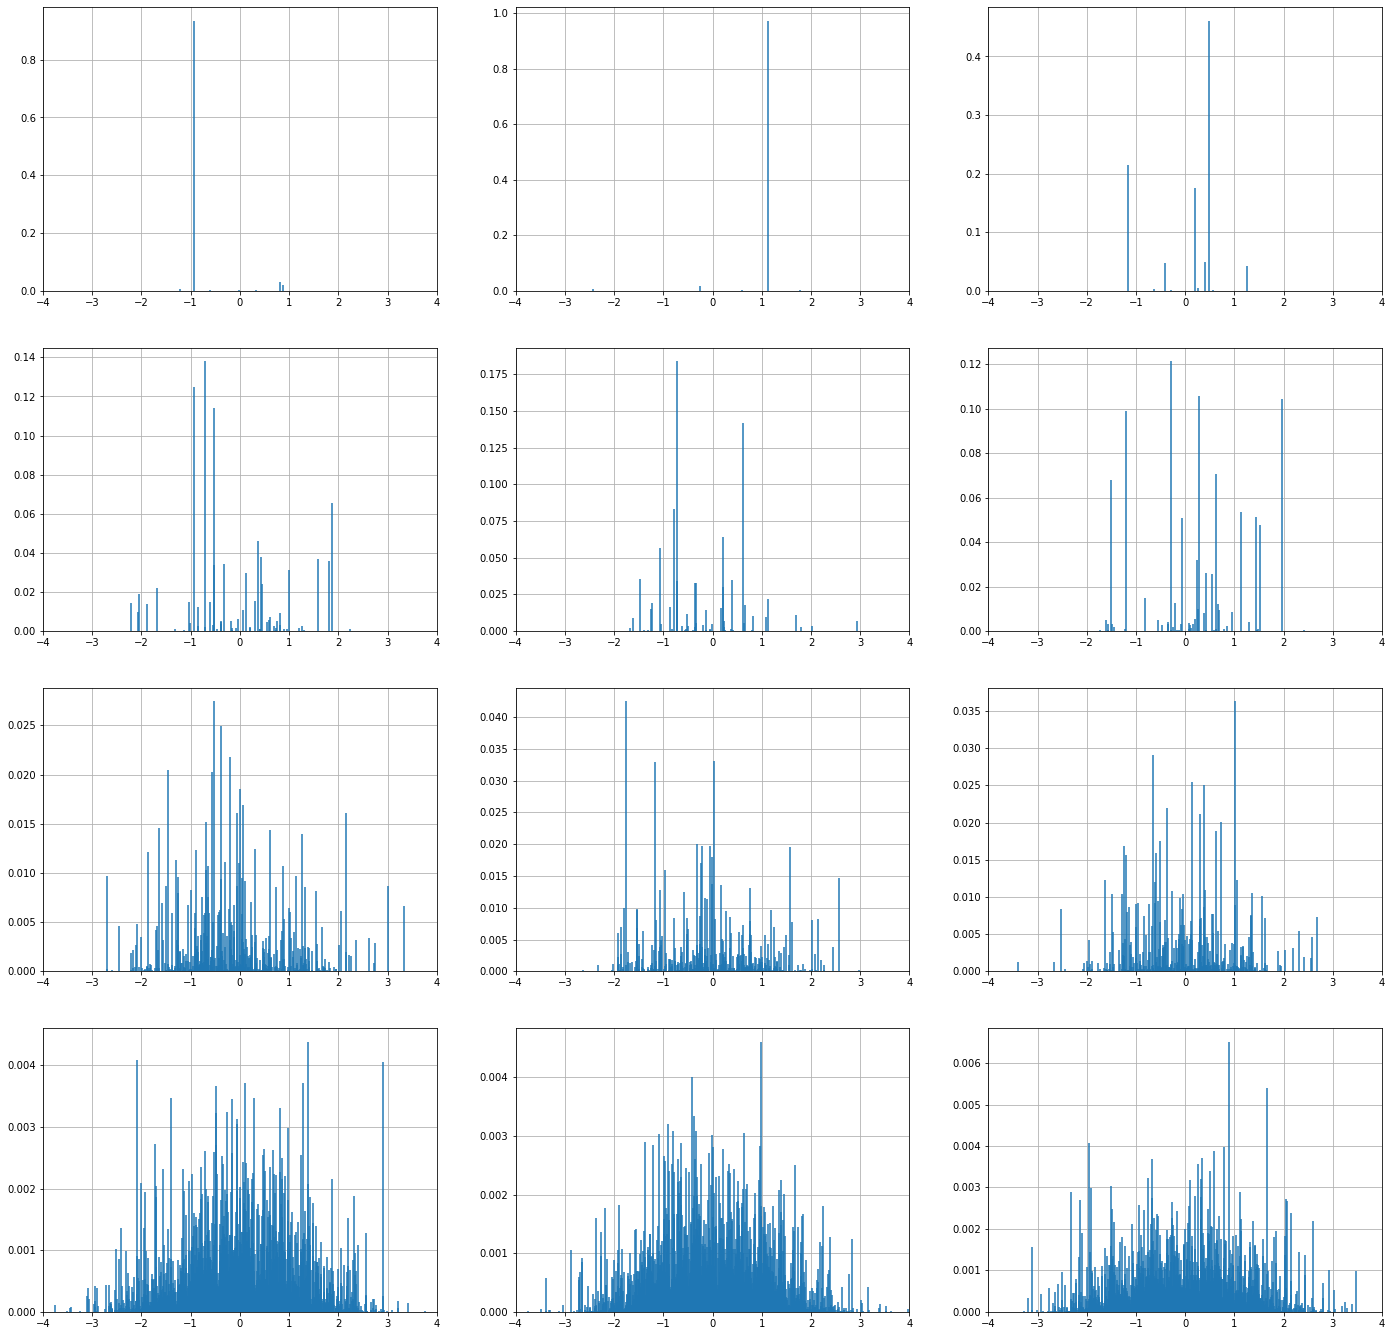

In [80]:
fix, axs = plt.subplots(4, 3, figsize=(24,24))
for k in range(4):
    for j in range(3):
        y = dp[k].G_0.rvs(dp[k].n)
        p = dp[k].pdf()
        [axs[k,j].vlines(y[i], 0, p[i]) for i in range(n)]
        axs[k,j].set_ylim(0,None)
        axs[k,j].set_xlim(-4,4)
        axs[k,j].grid(True)